# Test 2b - Merge, Aggregate, Visualize

## Introduction

This problem tests your ability to merge, aggregate, and visualize data.
You'll work with realistic business data to answer questions about product profitability.

Before submitting, ensure your notebook:

- Includes your verification info (Banner ID and code) as the first cell
- Runs completely with "Kernel → Restart & Run All"
- Shows your work (don't just print final answers)
- Includes your interpretation responses at the end

## Dataset: Bean & Brew Coffee Shop

You've been hired to analyze sales data for Bean & Brew, a local coffee shop chain with three locations. The owner wants to understand which products are most profitable and how profitability varies across locations.

There are two data files:

- `sales.csv` - Individual transaction records
  - `transaction_id`: Unique transaction identifier
  - `timestamp`: Date and time of purchase (format: 'YYYY-MM-DD HH:MM:SS')
  - `location`: Store location ('Downtown', 'Campus', 'Suburb')
  - `product_id`: Product identifier (links to products table)
  - `quantity`: Number of units sold
  - `revenue`: Total revenue from transaction
  - `payment_method`: Payment type ('Cash', 'Credit', 'Mobile')
  - `loyalty_member`: Boolean indicating if customer is loyalty program member
- `products.csv` - Product catalog
  - `product_id`: Unique product identifier
  - `name`: Product name
  - `category`: Product category ('Coffee', 'Tea', 'Pastry', 'Sandwich')
  - `cost`: Cost to make/acquire one unit (for profit calculation)

The dataset contains two weeks of sales data (approximately 3,000 transactions) across 18 products. It includes both regular and premium items in each category.

We are interested in learning which product categories generate the most profit, and how does profitability vary across locations? Complete the following tasks to answer those questions and more.

## Scoring

Total: 30 points (+ 5 bonus)

- Tasks 1-6: 18 points
- Interpretation (Questions 1-4): 12 points
- Bonus: 5 points (optional)

## Generate Your Dataset

Before starting the analysis, you need to generate your unique dataset using your Banner ID.

1. Open a terminal in the folder containing `generate_test2b_data.py`
2. Activate your conda virtual environment
3. Run: `python generate_test2b_data.py`
4. Enter your 9-digit Banner ID when prompted (you'll enter it twice to confirm)

The script will create two files in the `data/` folder:

- `data/products.csv` - Product catalog
- `data/sales.csv` - Transaction records

Important: At the end, the script displays a verification block like this:

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904123456
verification code:  5e0dXXXXXXXX
======================================================================
```

Copy the banner id and verification code lines and paste them into the cell below. This is required for submission.

```
paste your banner id and verification code here...

```
banner id:          904511182
verification code:  ff60ff72fb19

## Setup: Load the Data

Run the cell below to load the data. The code is provided for you.

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (provided)
sales = pd.read_csv('data/sales.csv', parse_dates=['timestamp'])
products = pd.read_csv('data/products.csv')

print(f"Sales: {len(sales)} transactions")
print(f"Products: {len(products)} items in catalog")
print()
print("Sales preview:")
sales.head()

Sales: 2743 transactions
Products: 18 items in catalog

Sales preview:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member
0,1000,2025-11-09 06:21:00,Suburb,104,1.0,2.72,Cash,True
1,1001,2025-11-09 06:34:00,Campus,101,1.0,2.73,Credit,False
2,1003,2025-11-09 07:03:00,Suburb,115,1.0,10.61,Mobile,True
3,1008,2025-11-09 07:13:00,Suburb,107,1.0,1.77,Mobile,False
4,1004,2025-11-09 07:14:00,Suburb,105,1.0,3.42,Credit,True


In [193]:
# Products catalog
products

,product_id,name,category,cost
0,101,Espresso,Coffee,1.2
1,102,Cappuccino,Coffee,1.8
2,103,Latte,Coffee,1.9
3,104,Americano,Coffee,1.0
4,105,Cold Brew,Coffee,1.5
5,106,Nitro Cold Brew,Coffee,2.5
6,107,Green Tea,Tea,0.8
7,108,Chai Latte,Tea,1.2
8,109,Herbal Tea,Tea,0.7
9,110,Premium Matcha,Tea,2.2


## Task 1: Data Quality Check

Investigate the sales data quality and coverage. Your code should answer the following questions:

1. How many missing values are in each column?
2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
3. What is the date range (earliest and latest transaction)?

### Your Code

In [208]:
# Task 1: use isna(), nunique(), min/max on timestamp
count_missing = sales.isna().sum() #Sum the number of missing values in each column
print("Missing values in each column:\n", count_missing)
unique_prod = sales['product_id'].nunique() #Unique product ids
print("\nNumber of unique product ids:\n", unique_prod)
min_start = sales['timestamp'].min() #Earliest transaction 
max_start = sales['timestamp'].max() #Latest transaction
print("\nMin Date:\n", min_start)
print("\nMax Date:\n", max_start)

Missing values in each column:
 transaction_id    0
timestamp         0
location          0
product_id        0
quantity          3
revenue           3
payment_method    0
loyalty_member    0
dtype: int64

Number of unique product ids:
 21

Min Date:
 2025-11-09 06:21:00

Max Date:
 2025-11-22 21:11:00


## Task 2: Merge Sales with Products

Merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.

### Your Code

In [213]:
# Task 2: use pd.merge() with appropriate join type
sales_prods = pd.merge(sales, products,on='product_id', how='left') #Merge DataFrames on product_id since it appears in both
sales_prods

,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member,name,category,cost
0,1000,2025-11-09 06:21:00,Suburb,104,1.0,2.72,Cash,True,Americano,Coffee,1.0
1,1001,2025-11-09 06:34:00,Campus,101,1.0,2.73,Credit,False,Espresso,Coffee,1.2
2,1003,2025-11-09 07:03:00,Suburb,115,1.0,10.61,Mobile,True,Turkey Club,Sandwich,3.5
3,1008,2025-11-09 07:13:00,Suburb,107,1.0,1.77,Mobile,False,Green Tea,Tea,0.8
4,1004,2025-11-09 07:14:00,Suburb,105,1.0,3.42,Credit,True,Cold Brew,Coffee,1.5
...,...,...,...,...,...,...,...,...,...,...,...
2738,3735,2025-11-22 19:42:00,Suburb,115,1.0,9.56,Credit,False,Turkey Club,Sandwich,3.5
2739,3736,2025-11-22 19:57:00,Downtown,101,1.0,3.31,Mobile,False,Espresso,Coffee,1.2
2740,3739,2025-11-22 20:01:00,Suburb,116,1.0,7.52,Credit,True,Veggie Wrap,Sandwich,2.8
2741,3738,2025-11-22 20:20:00,Campus,107,1.0,1.63,Credit,True,Green Tea,Tea,0.8


## Task 3: Verify the Merge

After merging, verify that the merge worked correctly:

1. Compare the shape of the merged DataFrame to the original sales data
2. Check if any rows have missing values in the product columns (name, category, cost)
3. If there are missing values, identify which product_id(s) are causing the problem

### Your Code

In [214]:
# Task 3: check shape, isna() on product columns, filter to find problem IDs
print("Original Sales DataFrame Shape:", sales.shape)
print("Merged DataFrame Shape:", sales_prods.shape)

count_missing_1 = (sales_prods['name'].isna() | sales_prods['category'].isna() | sales_prods['cost'].isna()) #Boolean checking if any of 'Name', 'Category', or 'Cost' have missing data
index = sales_prods[count_missing_1] #Aqcuires the rows with missing data in 'Name', 'Category', or 'Cost' columns
missing_id = index.groupby('product_id').size().reset_index() #Group by 'prdocut_id' that are causing problems and counts number of occurrence of each that are found
missing_id

Original Sales DataFrame Shape: (2743, 8)
Merged DataFrame Shape: (2743, 11)


,product_id,0
0,199,3
1,200,1
2,201,5


## Task 4: Profit by Category

First, calculate profit for each transaction: `profit = revenue - (cost × quantity)`

Then summarize profitability by product category. Your code should return a table that shows both total profit and number of transactions for each category. Sort it by total profit (highest first).

### Your Code

In [215]:
# Task 4: create profit column, then groupby with .agg()
sales_prods['profit'] = sales_prods['revenue'] - (sales_prods['cost'] * sales_prods['quantity']) #Create a new column in the DataFrame called, "profit" and use the equation to calc. profit for each row
total_profit = sales_prods.groupby('category')['profit'].sum().sort_values(ascending=False).reset_index() #Groups the total profit by category and sorts it from largest to smallest
total_profit

,category,profit
0,Sandwich,4300.73
1,Coffee,2311.61
2,Pastry,1712.10
3,Tea,851.11


## Task 5: Profit by Category and Location

Analyze how profitability varies by both category and location. Your code should produce a table that shows the following for every combination of category and location:

- Total profit
- Average profit per transaction
- Number of transactions

Display the results as a flat table (i.e., without a nested/hierarchical index).

### Your Code

In [218]:
# Task 5: groupby multiple columns, .agg() with dict, reset_index()
group = sales_prods.groupby(['location','category']).agg( #Grouping by location and cateogry and suming on profit, calculaing average profit per transaction, and counting the number of transactions 
    profit=('profit', 'sum'),
    average_profit=('profit', 'mean'),
    transactions=('transaction_id', 'count')
).reset_index() #Resetting the index
group

,location,category,profit,average_profit,transactions
0,Campus,Coffee,1053.46,2.014264,525
1,Campus,Pastry,689.18,2.515255,274
2,Campus,Sandwich,738.73,5.431838,136
3,Campus,Tea,197.35,1.121307,176
4,Downtown,Coffee,1084.47,3.054845,356
5,Downtown,Pastry,655.14,3.448105,190
6,Downtown,Sandwich,2661.30,7.758892,344
7,Downtown,Tea,321.04,1.945697,166
8,Suburb,Coffee,173.68,2.379178,73
9,Suburb,Pastry,367.78,2.786212,132


## Task 6: Visualize Category Profitability

Create a bar chart showing total profit by product category. Use seaborn and ensure that the result:

- Has clearly labeled categories
- Includes a descriptive title
- Makes it clear which category is most/least profitable

### Your Code

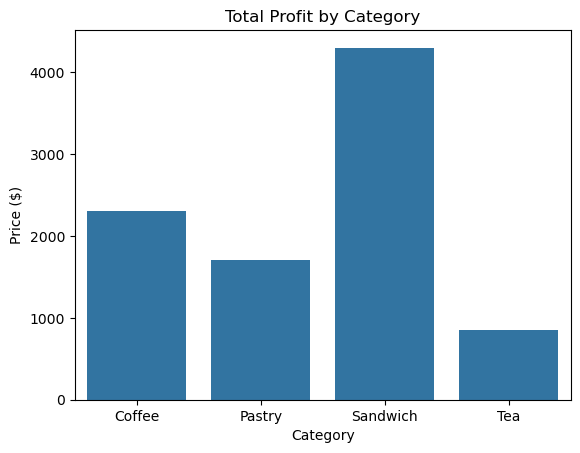

In [219]:
# Task 6: use sns.barplot() with aggregated data
import seaborn as sns

group = group.groupby('category')['profit'].sum().reset_index() #Grouping by category to sum profit for each
profit_plot = sns.barplot( #Seaborn bar plot 
    data=group,
    x='category',
    y='profit'
)

profit_plot.set_title('Total Profit by Category') #Set plot title
profit_plot.set_xlabel('Category') #Set plot x-axis label
profit_plot.set_ylabel('Price ($)'); #Set plot y-axis label

## Interpretation

Concisely answer the following questions based on your analysis.


1. What might go wrong if you did not verify the merge in Task 3 before proceeding with the analysis?
2. In Tasks 4 and 5, you aggregated data at different levels of detail (by category, then by category and location). How did this change what you could learn from the data?
3. Reflect on the patterns you discovered in your analysis. What valuable insights did your work generate?
4. The coffee shop owner asks: "Based on your analysis, what's the single most important thing I should do to improve profitability?" Provide a specific, actionable recommendation. Justify your recommendation with evidence from your analysis (include specific numbers from your results). Also, suggest additional analysis that you feel might be worthwhile.

### Your Answers

*Interpretation responses here*
1. Without verifying, it's possible that duplicate rows or columns could have been created or if columns have the same name, it would default to _x and _y column headings. Some rows or columns could also get dropped off depending on which method of merge used, whether left, right, innerm outter, etc. This all could cause downstream calculations to be incorrect.  

2. It helped you be able to see if you could see how profits are affected by relationships between multiple features. In this case you're able to learn about which locations are most profitable, which products are most profitable, and which products are most protifable at each store, so you can position your inventory to match with sales data of what people in specific areas are buying most frequently.

3. The data gives us an idea of the profitability of each product as well as each location. Aggregating the total profit clearly shows that there is not an even distribution amongst the products. There are also products that generate more profit per transaction compared to others and there is also a clear difference in the distribution of product purchases based on location. This can help in determining what inventory levels should be for each product and also for each location which is part of the overal strategy of creating good profit margins and maximixng transaction efficincy interms of profit per transaction. We can also evaluate what products to continue to sell verses ones that maybe are dropped of or swapped out for something else if it's hurting the bottom line profits. Tea is nearly half as profitable as pastries and is nearly a quarter as profitable as coffee. This can also help keep from purchasing too much inventory only for it to stay on the shelf longer which could become a problem if products that are sold have a specific shelf life before they spoil. 

4. I would definitely focus on the highest profiting prodcuts and stragize around those with inventory and promotions. I would also explore removing/replacing products that are providing only fractional profits compared to others, such as tea in this specific case. Purchsing inventory on products that are not really making an impact on profits hurts the bottom line. 

## Bonus: Time-Based Analysis (Optional)

For extra credit, investigate a time-based question of your choosing. Examples of questions you could explore include:

- Do sales patterns differ between weekdays and weekends?
- Which hours are busiest at each location?
- Is there a day of the week that stands out for profitability?

For full credit you must:

- State your question clearly
- Show your analysis code
- Summarize what you found in 2-3 sentences

Text(0.5, 1.0, 'Profit by category')

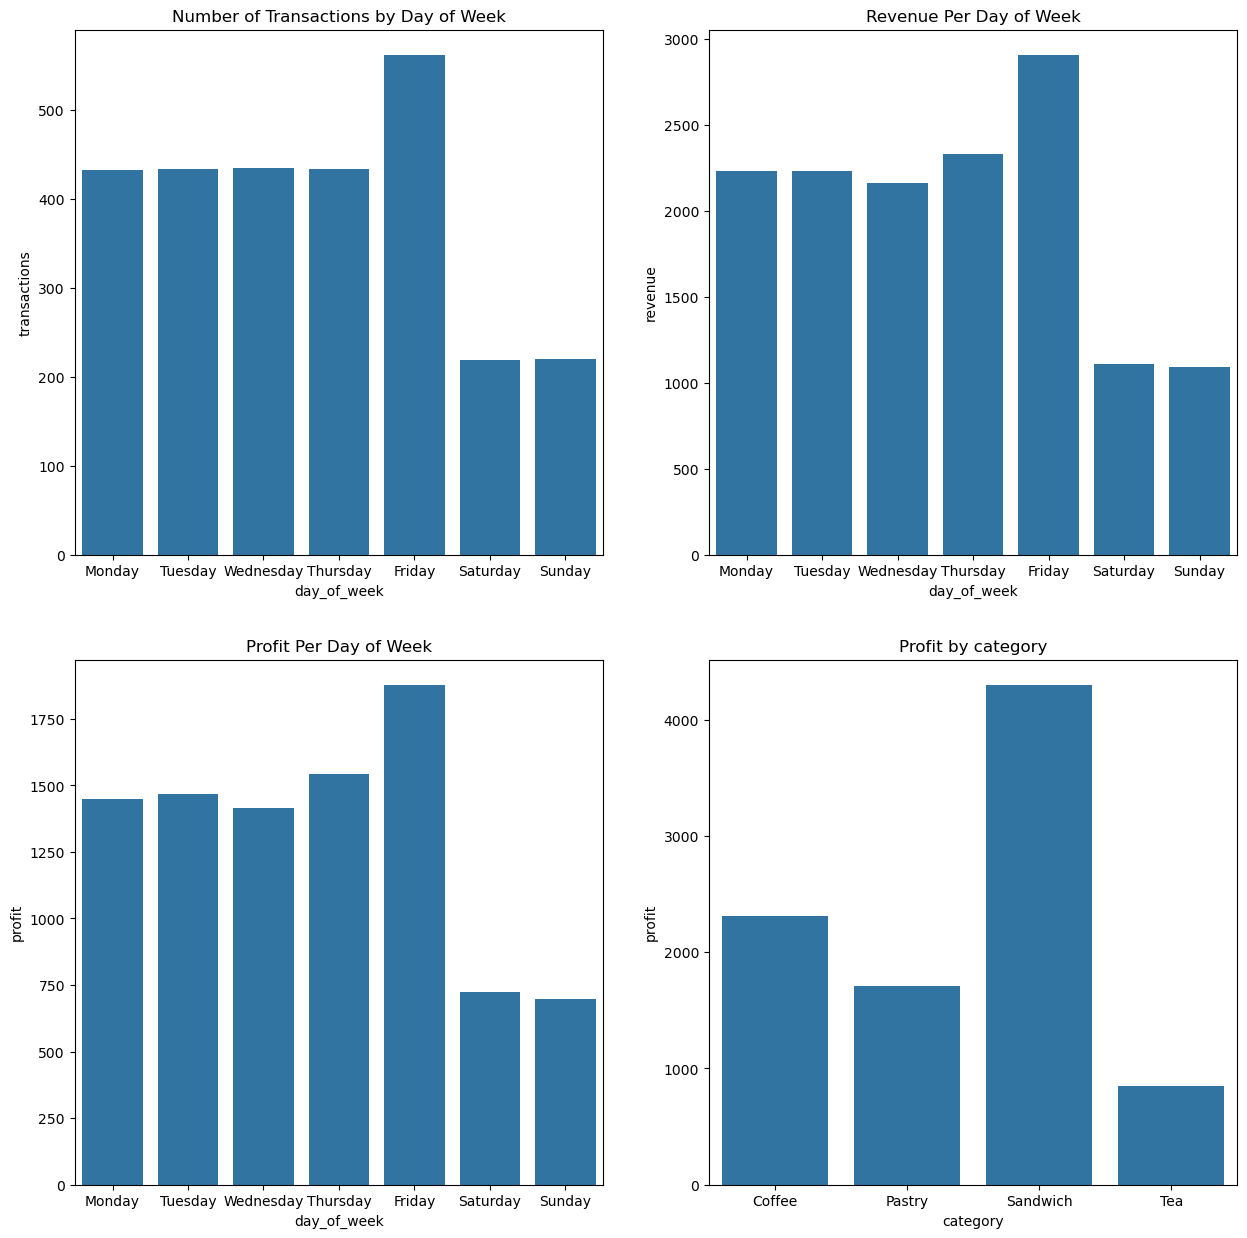

In [185]:
# Bonus: Your time-based analysis here

sales_prods['day_of_week'] = sales_prods['timestamp'].dt.day_name() #Adding a column that identifies the timestamps with propoer day of the week
sales_days = sales_prods.groupby(['day_of_week', 'category']).agg( #Grouping by days of the week and category and aggregating by transactions per day, revenue per day, and profit by day of the week
    transactions=('day_of_week', 'count'),
    revenue=('revenue', 'sum'),
    profit=('profit', 'sum'),
)
sales_days.reset_index() #restting the index

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] #Creating an order list to use for bar plot order

fig, axes = plt.subplots(2, 2, figsize=(15,15)) #4 subplots to compare data of transactions per day, revenue per day, profit per day, and profit by category
sns.barplot(
    data=sales_days,
    x='day_of_week',
    y='transactions',
    order=day_order,
    estimator='sum',
    errorbar=None,
    ax=axes[0,0]
)
axes[0,0].set_title('Number of Transactions by Day of Week') #Setting plot title

sns.barplot(
    data=sales_days,
    x='day_of_week',
    y='revenue',
    order=day_order,
    estimator='sum',
    errorbar=None,
    ax=axes[0,1]
)
axes[0,1].set_title('Revenue Per Day of Week') #Setting plot title

sns.barplot(
    data=sales_days,
    x='day_of_week',
    y='profit',
    order=day_order,
    estimator='sum',
    errorbar=None,
    ax=axes[1,0]
)
axes[1,0].set_title('Profit Per Day of Week') #Setting plot title

sns.barplot(
    data=sales_days,
    x='category',
    y='profit',
    estimator='sum',
    errorbar=None,
    ax=axes[1,1]
)
axes[1,1].set_title('Profit by category') #Setting plot title

### Your Findings

*Bonus findings here (state your question and what you discovered)*
1. Is there a day of the week that stands out for profitability?
   Yes, Friday is the most profitable day. It's the busiest day on number of transaction and has the highest revenue
   
2. What product category is most profitable?
   Sandwiches are clearly the most profitable product. Sandwhiches alone is nearly equal to the profitability of coffee, pastry, and tea combined

3. Are weekend or weekdays more busy?
   Weekdays are definitely the busiest with weekends comparing at almost half of the foot traffic of weekdays

## Submission

Ensure your notebook:

- Has the verification block (Banner ID and code) as the first cell
- Runs completely from top to bottom without errors
- Shows all task outputs clearly
- Includes all interpretation responses
- Is saved and committed to your repository

Follow the submission instructions on Canvas to submit your work.